In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
print("We import the libraries we will use")

We import the libraries we will use


In [2]:
df=pd.read_excel('DATA.xlsx')
#We read the excel file
print(df.head()) # We then print the first 5 rows 

   Student  Hours_Coding  Num_Bugs
0        1          10.7        25
1        2          24.8        50
2        3          19.4        38
3        4          16.2        31
4        5           5.3         3


In [3]:
#We then confirm the column names, preferrably by arranging them into a list
tableColumns=df.columns
print("Columns:",tableColumns.tolist())

Columns: ['Student', 'Hours_Coding', 'Num_Bugs']


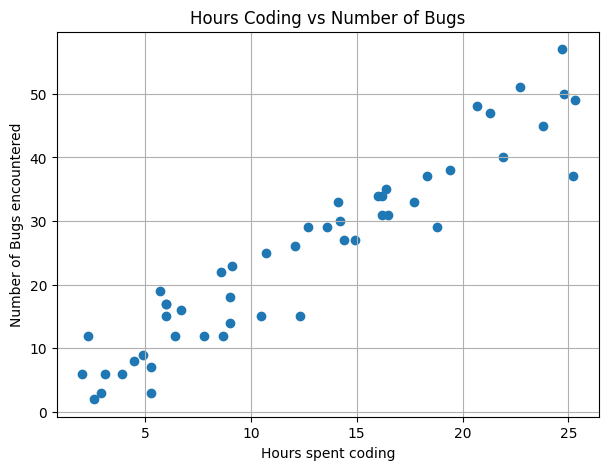

In [4]:
#We want our image to be 7 inches wide and 5 inches tall
plt.figure(figsize=(7,5))

#Our idea is to plot Number of coding hours (x-axis) vs the number of bugs (y-axis)

plt.scatter(df['Hours_Coding'],df['Num_Bugs'])

#Labelling of the axes
plt.xlabel('Hours spent coding')
plt.ylabel('Number of Bugs encountered')
plt.title('Hours Coding vs Number of Bugs')

plt.grid(True) #displays the grid lines)
plt.show()



In [5]:
total_hours_coding=df["Hours_Coding"].sum()

    
print("Sum of x: ",total_hours_coding)
# we can then take (sum of x) squared in its standard deviation equation

total_num_of_bugs=df["Num_Bugs"].sum()
print("Sum of y: ",total_num_of_bugs)
#We can then also take (sum of y) squared in its standard deviation equation

##This will be sum of x multiplied by sum of y in the numerator of the equation

# We then get x squared sum and y squared sum, as follows.

total_hours_coding_squared=(df['Hours_Coding']**2).sum()
print("Sum of (x) squared",total_hours_coding_squared)

total_num_of_bugs_squared=(df['Num_Bugs']**2).sum()
print("Sum of (y) squared",total_num_of_bugs_squared)

## We then come up with the equation now that we have all parameters

#I am devicing a way on how to come up with the sum of individual elements in the
#hours coding and its corresponding num_bugs column.
#product=df['Hours_Coding'].iloc[0] * df['Num_Bugs'].iloc[0]
#print(product)
# Calculate the product of Hours_Coding and Num_Bugs for each row and print
products = (df['Hours_Coding'] * df['Num_Bugs'])

products_list=products.tolist()
sum_of_xy=0
for product in products_list:
    sum_of_xy=sum_of_xy+product

print("Sum of xy: ", sum_of_xy)

Sum of x:  621.1999999999999
Sum of y:  1241
Sum of (x) squared 10173.720000000001
Sum of (y) squared 41193
Sum of xy:  20214.09999999999


## Calculating Pearson's Correlation Coefficient

$$
r = \frac{n\sum xy - \sum x \sum y}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}
$$


In [6]:
#The pearson correlation coeffecient is taken by: 

'''
1. Numerator
We take the number of observations [0,49] or 50 multiplied by the sum of xy,
We then subtract the product of the sum of x and the sum of y

2. Denominator
We take the sum of all x_squared - (the sum of all x) squared
We then do the same for y
we multiply the two and get the square root.

'''

#The Numerator is thus: 
number_of_observations=50
covariance_of_x_and_y=(number_of_observations*sum_of_xy) - (total_hours_coding*total_num_of_bugs)
print("Covariance of x,y: ", covariance_of_x_and_y)

#The denominator is thus:
#First we do prerequisite calculations to make the work in finding sqrt simpler

variance_x=(number_of_observations*total_hours_coding_squared)-(total_hours_coding**2)
variance_y=(number_of_observations*total_num_of_bugs_squared)-(total_num_of_bugs**2)

varicances_product=variance_x * variance_y
print("(Variacne of x)(Variance of y): ", varicances_product)

sdx_sdy=np.sqrt(varicances_product)
print("(SD_x)(SD_y) :", sdx_sdy)



pearsons_correlation_coefficient= covariance_of_x_and_y/sdx_sdy

print("Pearson's correlation coefficient",pearsons_correlation_coefficient)

if (pearsons_correlation_coefficient<0):
    if (pearsons_correlation_coefficient<-0.5):
        print("This is a highly negative correlation")
    else:
        print('This is a negative correlation')
else:
    if(pearsons_correlation_coefficient>0.5):
        print("This is a strongly positive correlation")
    else:
        print('This is a positive correlation')


Covariance of x,y:  239795.79999999958
(Variacne of x)(Variance of y):  63801285882.64006
(SD_x)(SD_y) : 252589.16422253757
Pearson's correlation coefficient 0.949351096426026
This is a strongly positive correlation


## Developing a Regression equation

$$y=a+bx$$

Since there is a `strong positive correlation`, it then follows that probably the number of bugs encountered by a programmer while coding directly affects the number of hours they will spend coding in a **positive** way.
<br>

In other words, an **increase in the number of bugs** encountered will lead to an **increase in the number of hours** one will spend coding. (Directly proportional)


```python
#y is the number of coding hours
#x is the number of bugs spotted
'''
y and x are provided within the dataset but we do not know a and b, the determinants for
our line of best fit.

a=y_bar - b x_bar, but we still do not know b
so we search for b.


'''
```


### Finding b

Based on a few derivations, we can deduce b to be the equation below
<br>

$$
b= \frac{n\sum xy - \sum x \sum y}{n\sum x^2- (\sum x)^2}
$$


In [7]:
# We had defined sum of xy earlier
#Finding b
b_numerator= (number_of_observations*sum_of_xy)-(total_hours_coding*total_num_of_bugs)
b_denomintator= (number_of_observations*total_hours_coding_squared)-(total_hours_coding**2)

b=b_numerator/b_denomintator

print("Coefficient b : ",b)


Coefficient b :  1.9527892312292736


### Finding a

We use the data that we obtain from finding b.

$$
a=\bar{y} - b\bar{x}
$$


In [8]:
'''
bar y is the mean count of bug
bar x is the mean hours spent coding
'''

bug_mean=total_num_of_bugs/number_of_observations
coding_mean=total_hours_coding/number_of_observations

a=bug_mean-(b*coding_mean)

print("Coefficient a :", a)

Coefficient a : 0.5585465912075058


### The regression equation

Now that we have a and b, (intercept and gradient), we can develop a general equation for this relationship.

$$
y=mx+c
$$

$$
y=1.953x + 0.559
$$

Our next task is to use the model to predict the number of bugs for 20 hours of coding.
We will substitute 20 to be y and then solve for x, as follows:<br>

$Number of bugs=1.953x +0.559$


In [22]:

#The number of bugs for 20 hours of coding will then be executed
#by the following operation
def prediction_equation(number):
    #Returns the number of bugs based on a specific number of hours
    bugs_prediction=(1.953*number +0.559)
    return bugs_prediction

#bugs_prediction=(1.953*20)+0.559
print("Number of bugs for 20 hours: ",prediction_equation(20))

Number of bugs for 20 hours:  39.619


## Developing a frequency distribution


```python
frequency_df = df['Num_Bugs'].value_counts().sort_index().reset_index()
'''
Value counts -> counts the frequency of values in the num_bugs column
Sort index -> sorts the values in ascending order
reset index -> converts a frequency series into a datframe with a column of the value counts
'''
frequency_df.columns = ['Num_Bugs', 'Frequency']
##print(frequency_df)
```


In [10]:
frequency_df = df['Num_Bugs'].value_counts().sort_index().reset_index()
frequency_df.columns = ['Num_Bugs', 'Frequency']
print(frequency_df)

    Num_Bugs  Frequency
0          2          1
1          3          2
2          6          3
3          7          1
4          8          1
5          9          1
6         12          4
7         14          1
8         15          3
9         16          1
10        17          2
11        18          1
12        19          1
13        22          1
14        23          1
15        25          1
16        26          1
17        27          2
18        29          3
19        30          1
20        31          2
21        33          2
22        34          2
23        35          1
24        37          2
25        38          1
26        40          1
27        45          1
28        47          1
29        48          1
30        49          1
31        50          1
32        51          1
33        57          1


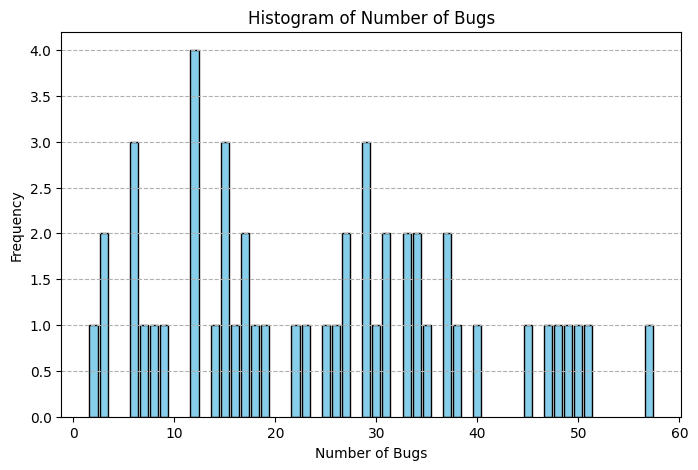

In [19]:
#Plot the histogram

plt.figure(figsize=(8,5))
plt.bar(frequency_df['Num_Bugs'], frequency_df['Frequency'], width=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Number of Bugs')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bugs')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


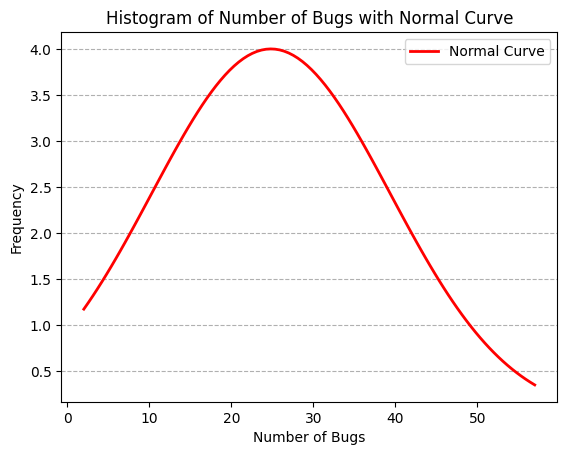

In [20]:
#Overlaying a normal curve on the distribution
from scipy.stats import norm


sample_mean=df['Num_Bugs'].mean()
std_deviation=df['Num_Bugs'].std()

#Generate x values in the range from min to max
#probably 100 equal divisions from the minimum to the maximum, i think

x=np.linspace(df['Num_Bugs'].min(),df['Num_Bugs'].max(),100)

histogram_max=frequency_df['Frequency'].max()
probability_density_function = norm.pdf(x, sample_mean, std_deviation)
#We generate a normal curve using the matplot library, for each of the values
#We then need to scale the pdf so that it matches the hieght of the histogram bars

pdf_to_scale=probability_density_function*(histogram_max/probability_density_function.max())

plt.plot(x, pdf_to_scale, color='red', linewidth=2, label='Normal Curve')

plt.xlabel('Number of Bugs')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bugs with Normal Curve')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.legend()
plt.show()
